In [2]:
import csv
import math
import matplotlib.pyplot as plt

In [4]:
def prob(e, S):
    return S[e]/sum(S.values())

def info(e, S):
    return -math.log2(prob(e, S))

def entropia(S):
    return sum([info(e, S) * prob(e, S) for e in S])

In [5]:
S1 = {}
direcciones = {'BROADCAST': 0, 'UNICAST': 0}
protocolos = {}
total = 20000

with open('output.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, )
    next(reader, None)  # skip the headers
    for [dire, proto, count] in reader:
        S1[(dire, int(proto))] = int(count)
        direcciones[dire] += int(count)
        if proto not in protocolos:
            protocolos[proto] = 0
        protocolos[proto] += int(count)


• Porcentaje de tráfico Broadcast/Unicast sobre el tráfico total.


porcentaje broadcast: 0.0%
porcentaje unicast: 100.0%


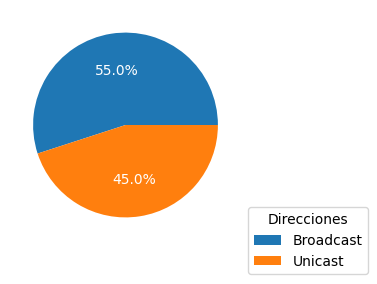

In [13]:
ratio_broadcast = direcciones['BROADCAST'] / total
print(f'porcentaje broadcast: {ratio_broadcast*100}%')
print(f'porcentaje unicast: {100 - ratio_broadcast*100}%')

labels = 'Broadcast', 'Unicast'
sizes = [ratio_broadcast*100, 100 - ratio_broadcast*100]
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', textprops=dict(color="w"))
ax.legend(wedges, labels,
          title="Direcciones",
          loc="center left",
          bbox_to_anchor=(1, 0))

plt.show()

• Porcentaje de aparición de cada protocolo encontrado.


porcentaje protocolo 2048: 99.72%
porcentaje protocolo 2054: 0.27999999999999997%


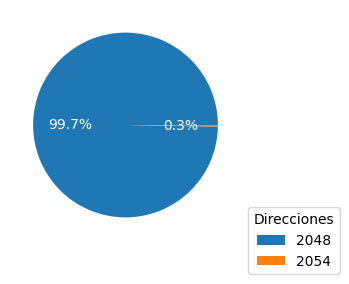

In [14]:
labels = []
sizes = []

for (proto, count) in protocolos.items():
  labels.append(proto) #traducir los protocolos a nombres
  sizes.append((count / total)*100) 
  print(f'porcentaje protocolo {proto}: {(count / total)*100}%')

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', textprops=dict(color="w"))
ax.legend(wedges, labels,
          title="Protocolos",
          loc="center left",
          bbox_to_anchor=(1, 0))

plt.show()

• Entropía de cada red analizada.


In [38]:
#Aca haria un bar plot de las entropias de todas las redes que analizamos para compararlas 
print(f'entropia: {entropia(S1)}')

entropia: 0.027778886345163643


• Cantidad de información de cada símbolo comparado con la entropía de la red.


info de evento (UNICAST,2048): 0.004045212057948735
info de evento (UNICAST,2054): 8.480357457491845


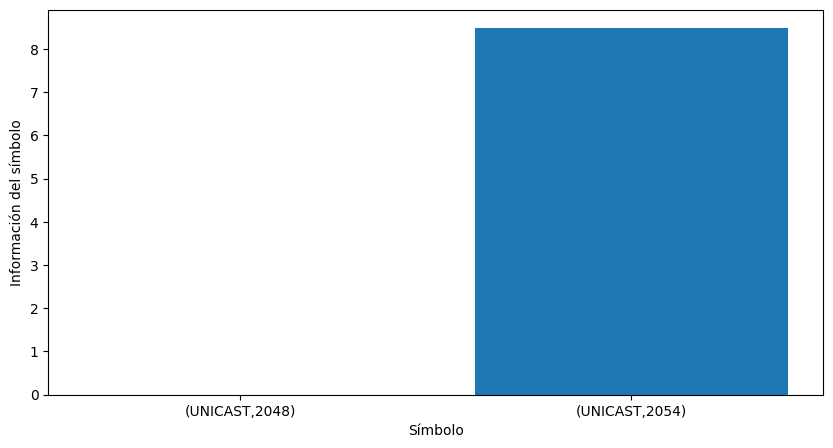

In [15]:
labels = []
data = []

for ((dire, proto), count) in S1.items():
  print(f'info de evento ({dire},{proto}): {info((dire, proto), S1)}')
  labels.append(f'({dire},{proto})')
  data.append(info((dire, proto), S1))


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(labels, data)
 
plt.xlabel("Símbolo")
plt.ylabel("Información del símbolo")
#plt.title("Students enrolled in different courses")
plt.show()

#a que se referirá con "comparado con"?? desconozco